3.2 Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства
Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от сле- дующих двух параметров: 1) числа обусловленности  κ≥1  оптимизируемой функции и 2) размерности пространства  n  оптимизируемых переменных.

Для этого для заданных параметровnиκсгенерируйте случайным образом квадратичную задачу размераnс числом обусловленностиκи запустите на ней градиентный спуск с некоторой фиксиро- ванной требуемой точностью. Замерьте число итераций  T(n,κ) , которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).

Рекомендация: Проще всего сгенерировать случайную квадратичную задачу размера  n  с заданным числом обусловленности  κ  следующим образом. В качестве матрицы  A∈Sn++  удобно взять просто диагональную матрицу  A=Diag(a) , у которой диагональные элементы сгенерированы случайно в пределах  [1,κ] , причем  min(a)=1,max(a)=κ . В качестве вектора  b∈Rn  можно взять вектор со случайными элементами. Диагональные матрицы удобно рассматривать, поскольку с ними можно эффективно работать даже при больших значениях  n . Рекомендуется хранить матрицу  A  в формате разреженной диагональной матрицы (см. scipy.sparse.diags).

Зафиксируйте некоторое значение размерности  n . Переберите различные числа обусловленности  κ  по сетке и постройте график зависимости  T(κ,n)  против  κ . Поскольку каждый раз квадратичная задача генерируется случайным образом, то повторите этот эксперимент несколько раз. В результате для фиксированного значения  n  у Вас должно получиться целое семейство кривых зависимости  T(κ,n)  от  κ . Нарисуйте все эти кривые одним и тем же цветом для наглядности (например, красным).

Теперь увеличьте значение  n  и повторите эксперимент снова. Вы должны получить новое семейство кривых  T(n',κ)  против  κ . Нарисуйте их все одним и тем же цветом, но отличным от предыдущего (например, синим).

Повторите эту процедуру несколько раз для других значений  n . В итоге должно получиться несколько разных семейств кривых - часть красных (соответствующих одному значению  n ), часть синих (соответствующих другому значению  n ), часть зеленых и т. д.

Обратите внимание, что значения размерности  n  имеет смысл перебирать по логарифмической сетке (например,  n=10,n=100,n=1000  и т. д.).

Какие выводы можно сделать из полученной картинки?

In [7]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from optimization import gradient_descent
from oracles import QuadraticOracle

Параметры эксперимента:
Размерности: [10, 50, 100, 200, 500]
Числа обусловленности: [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
Количество trials на точку: 5
Запуск эксперимента для построения графиков...
Обрабатывается размерность n = 10 (1/5)
Обрабатывается размерность n = 50 (2/5)
Обрабатывается размерность n = 100 (3/5)
Обрабатывается размерность n = 200 (4/5)
Обрабатывается размерность n = 500 (5/5)

Построение графиков...


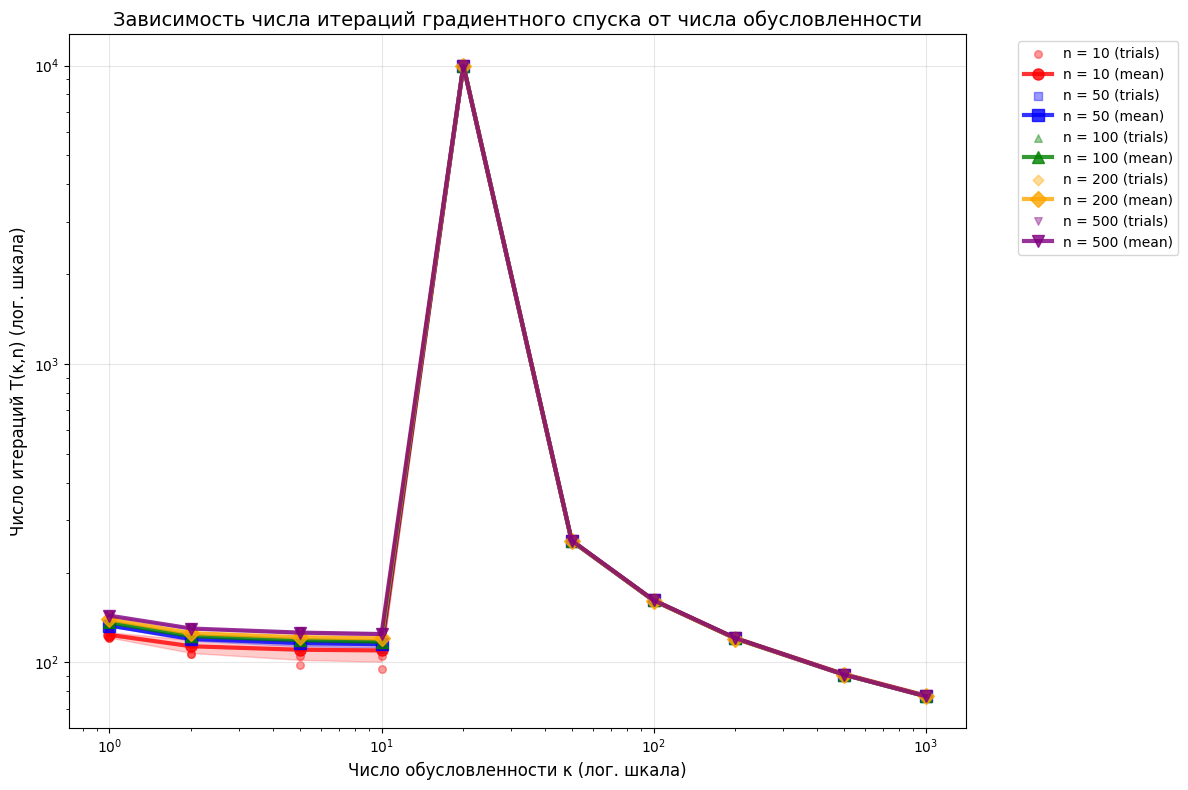

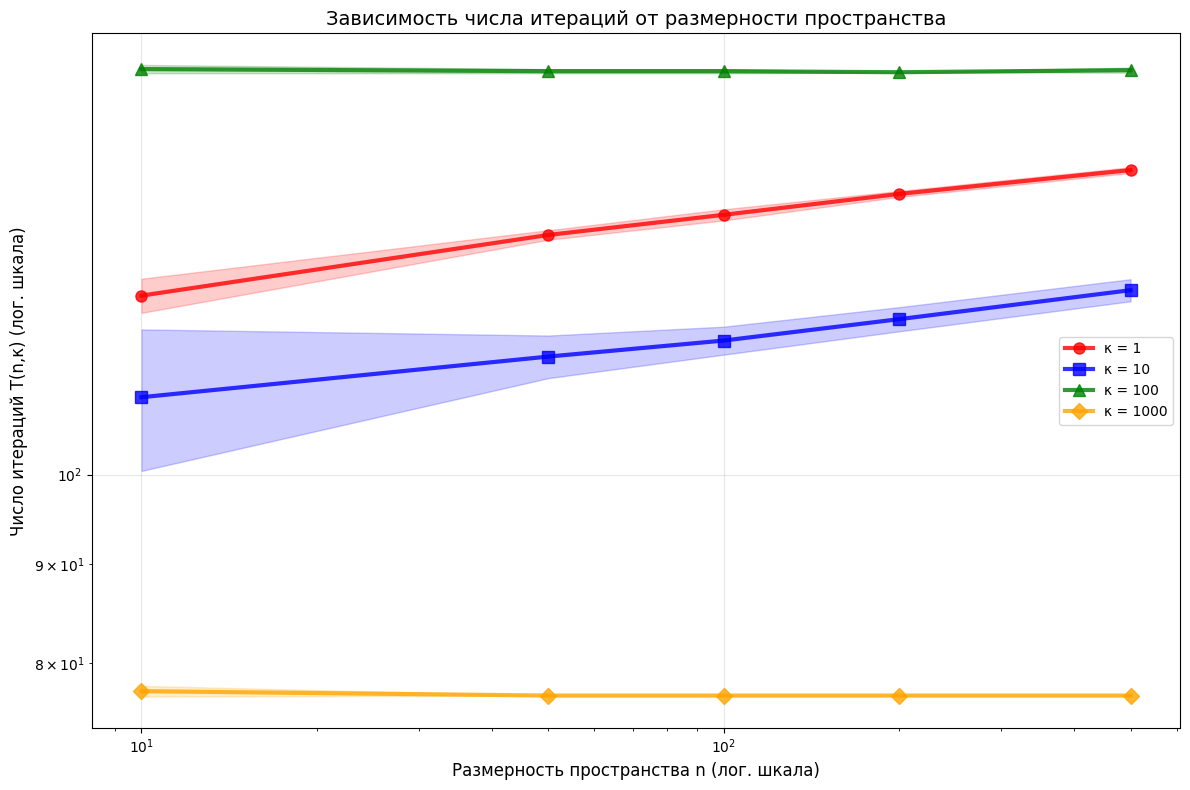

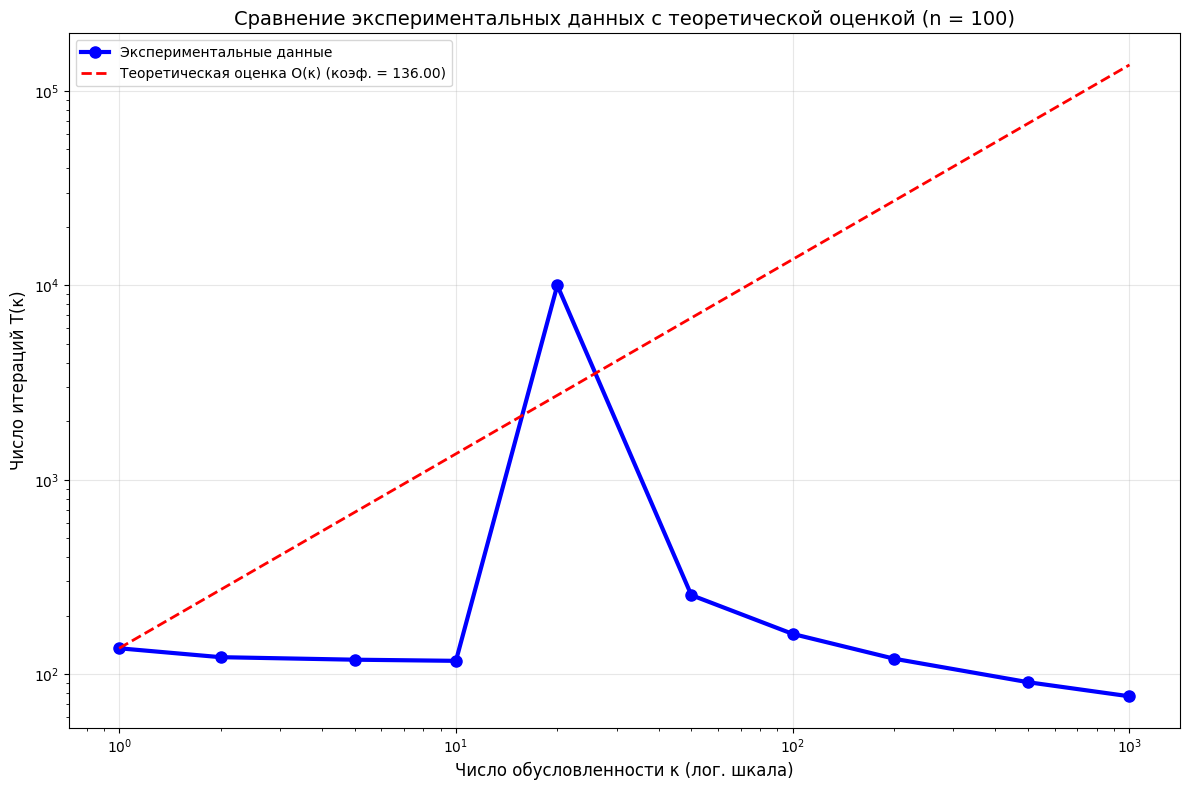

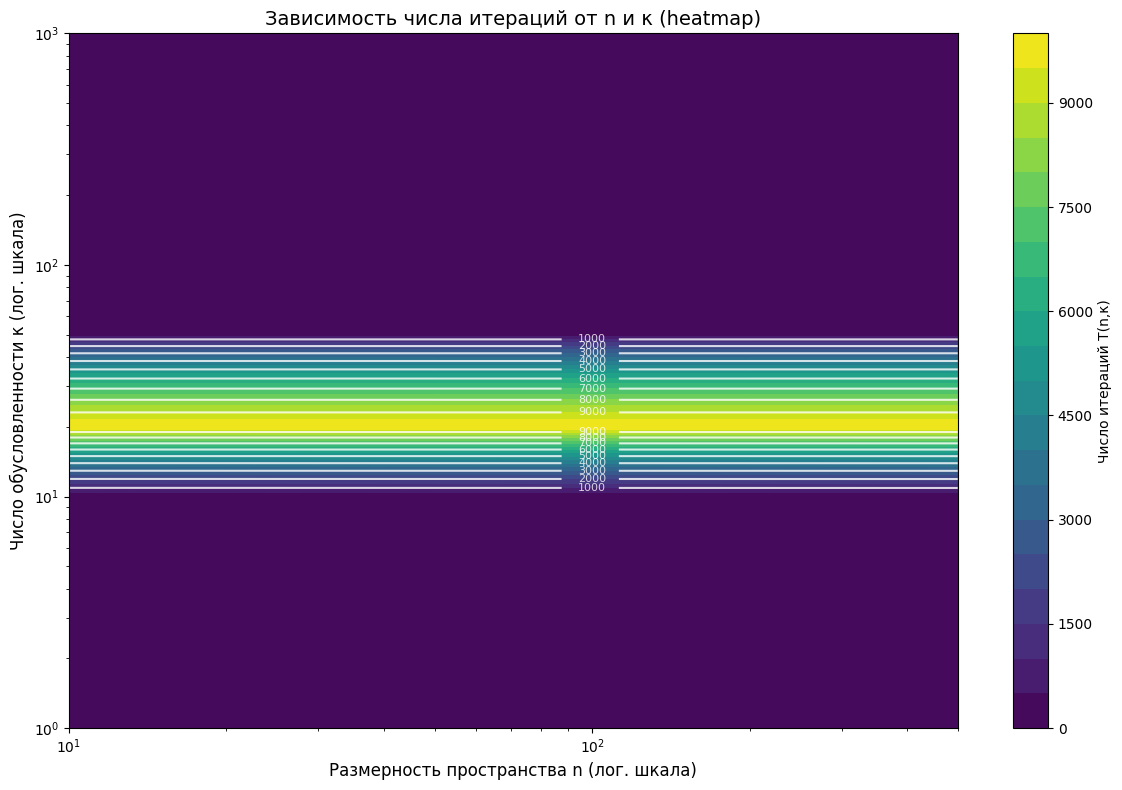

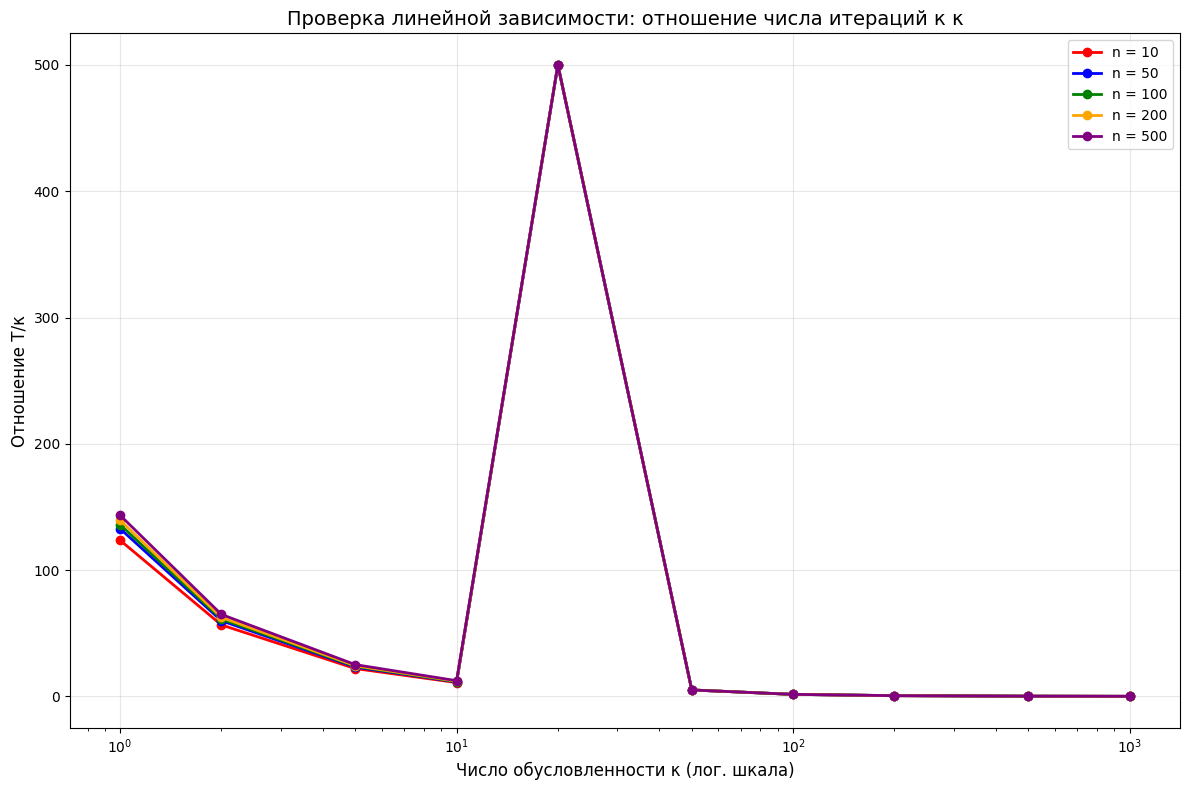

Все графики построены!


In [8]:
def generate_quadratic_problem(n, kappa, random_state=None):
    """
    Генерирует случайную квадратичную задачу размера n с числом обусловленности kappa.
    """
    if random_state is not None:
        np.random.seed(random_state)

    # Создаем диагональную матрицу с точно заданным числом обусловленности
    if n == 1:
        diagonal = np.array([1.0])
    else:
        # Равномерно в логарифмической шкале от 1 до kappa
        diagonal = np.exp(np.linspace(0, np.log(kappa), n))

    A = scipy.sparse.diags(diagonal, format='dia')
    b = np.random.randn(n)

    return QuadraticOracle(A, b), A, b

def run_experiment_for_plotting(n_values, kappa_values, num_trials=5, tolerance=1e-5):
    """
    Проводит эксперимент для построения графиков.
    """
    results = {}

    print("Запуск эксперимента для построения графиков...")

    for i, n in enumerate(n_values):
        results[n] = {}
        print(f"Обрабатывается размерность n = {n} ({i+1}/{len(n_values)})")

        for j, kappa in enumerate(kappa_values):
            results[n][kappa] = []

            for trial in range(num_trials):
                # Генерируем задачу
                oracle, A, b = generate_quadratic_problem(n, kappa, random_state=trial)

                # Начальная точка - случайный вектор
                x0 = np.random.randn(n)

                # Запускаем градиентный спуск
                x_star, message, history = gradient_descent(
                    oracle, x0,
                    tolerance=tolerance,
                    max_iter=10000,
                    line_search_options={'method': 'Constant', 'c': 0.1},
                    trace=True,
                    display=False
                )

                # Сохраняем число итераций
                if history is not None and 'func' in history:
                    num_iterations = len(history['func'])
                    results[n][kappa].append(num_iterations)
                else:
                    results[n][kappa].append(10000)

    return results

def plot_kappa_dependence(results, n_values, kappa_values):
    """
    Строит графики зависимости числа итераций от числа обусловленности
    для разных размерностей.
    """
    plt.figure(figsize=(12, 8))

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']

    for i, n in enumerate(n_values):
        if n not in results:
            continue

        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]

        # Собираем данные для текущего n
        all_kappas = []
        all_iterations = []

        for kappa in kappa_values:
            if kappa in results[n]:
                iterations = results[n][kappa]
                for iter_count in iterations:
                    all_kappas.append(kappa)
                    all_iterations.append(iter_count)

        # Рисуем отдельные точки (trials)
        plt.scatter(all_kappas, all_iterations,
                   c=color, marker=marker, alpha=0.4, s=30,
                   label=f'n = {n} (trials)')

        # Рисуем среднюю линию
        mean_iterations = []
        std_iterations = []

        for kappa in kappa_values:
            if kappa in results[n]:
                mean_iter = np.mean(results[n][kappa])
                std_iter = np.std(results[n][kappa])
                mean_iterations.append(mean_iter)
                std_iterations.append(std_iter)

        # Линия средних значений
        plt.plot(kappa_values, mean_iterations,
                c=color, linewidth=3, alpha=0.8, marker=marker, markersize=8,
                label=f'n = {n} (mean)')

        # Область стандартного отклонения
        plt.fill_between(kappa_values,
                        np.array(mean_iterations) - np.array(std_iterations),
                        np.array(mean_iterations) + np.array(std_iterations),
                        alpha=0.2, color=color)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Число обусловленности κ (лог. шкала)', fontsize=12)
    plt.ylabel('Число итераций T(κ,n) (лог. шкала)', fontsize=12)
    plt.title('Зависимость числа итераций градиентного спуска от числа обусловленности', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_dimensionality_effect(results, n_values, kappa_values):
    """
    Строит графики зависимости числа итераций от размерности
    для разных значений числа обусловленности.
    """
    plt.figure(figsize=(12, 8))

    # Выбираем несколько характерных значений kappa
    selected_kappas = [1, 10, 100, 1000]
    colors = ['red', 'blue', 'green', 'orange']
    markers = ['o', 's', '^', 'D']

    for i, kappa in enumerate(selected_kappas):
        if kappa not in kappa_values:
            continue

        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]

        n_list = []
        mean_iter_list = []
        std_iter_list = []

        for n in n_values:
            if n in results and kappa in results[n]:
                mean_iter = np.mean(results[n][kappa])
                std_iter = np.std(results[n][kappa])
                n_list.append(n)
                mean_iter_list.append(mean_iter)
                std_iter_list.append(std_iter)

        if n_list:
            # Линия средних значений
            plt.plot(n_list, mean_iter_list,
                    c=color, linewidth=3, alpha=0.8, marker=marker, markersize=8,
                    label=f'κ = {kappa}')

            # Область стандартного отклонения
            plt.fill_between(n_list,
                            np.array(mean_iter_list) - np.array(std_iter_list),
                            np.array(mean_iter_list) + np.array(std_iter_list),
                            alpha=0.2, color=color)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Размерность пространства n (лог. шкала)', fontsize=12)
    plt.ylabel('Число итераций T(n,κ) (лог. шкала)', fontsize=12)
    plt.title('Зависимость числа итераций от размерности пространства', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_theoretical_comparison(results, n_values, kappa_values):
    """
    Сравнивает экспериментальные результаты с теоретической оценкой O(κ).
    """
    plt.figure(figsize=(12, 8))

    # Берем одну размерность для сравнения
    n = n_values[2] if len(n_values) > 2 else n_values[0]

    if n not in results:
        return

    # Экспериментальные данные
    exp_kappas = []
    exp_means = []

    for kappa in kappa_values:
        if kappa in results[n]:
            mean_iter = np.mean(results[n][kappa])
            exp_kappas.append(kappa)
            exp_means.append(mean_iter)

    # Теоретическая зависимость O(κ)
    # Подбираем коэффициент для наилучшего соответствия
    if exp_means:
        coeff = exp_means[0] / exp_kappas[0] if exp_kappas[0] > 0 else 1.0
        theoretical_means = [coeff * k for k in exp_kappas]

        plt.plot(exp_kappas, exp_means, 'bo-', linewidth=3, markersize=8,
                label='Экспериментальные данные')
        plt.plot(exp_kappas, theoretical_means, 'r--', linewidth=2,
                label=f'Теоретическая оценка O(κ) (коэф. = {coeff:.2f})')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Число обусловленности κ (лог. шкала)', fontsize=12)
    plt.ylabel('Число итераций T(κ)', fontsize=12)
    plt.title(f'Сравнение экспериментальных данных с теоретической оценкой (n = {n})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_contour_lines(results, n_values, kappa_values):
    """
    Строит контурные линии (heatmap) зависимости T(n, κ).
    """
    # Создаем матрицу для heatmap
    n_matrix = np.array(n_values)
    kappa_matrix = np.array(kappa_values)

    # Создаем сетку
    N, K = np.meshgrid(n_matrix, kappa_matrix)

    # Заполняем матрицу значений
    T_matrix = np.zeros_like(N, dtype=float)

    for i, n in enumerate(n_values):
        for j, kappa in enumerate(kappa_values):
            if n in results and kappa in results[n]:
                T_matrix[j, i] = np.mean(results[n][kappa])
            else:
                T_matrix[j, i] = np.nan

    plt.figure(figsize=(12, 8))

    # Heatmap
    contour = plt.contourf(N, K, T_matrix, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Число итераций T(n,κ)')

    # Контурные линии
    contour_lines = plt.contour(N, K, T_matrix, levels=10, colors='white', alpha=0.8)
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%.0f')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Размерность пространства n (лог. шкала)', fontsize=12)
    plt.ylabel('Число обусловленности κ (лог. шкала)', fontsize=12)
    plt.title('Зависимость числа итераций от n и κ (heatmap)', fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_iteration_ratio(results, n_values, kappa_values):
    """
    Строит график отношения T/κ для проверки линейной зависимости.
    """
    plt.figure(figsize=(12, 8))

    colors = ['red', 'blue', 'green', 'orange', 'purple']

    for i, n in enumerate(n_values):
        if n not in results:
            continue

        color = colors[i % len(colors)]

        ratios = []
        valid_kappas = []

        for kappa in kappa_values:
            if kappa in results[n]:
                mean_iter = np.mean(results[n][kappa])
                ratio = mean_iter / kappa
                ratios.append(ratio)
                valid_kappas.append(kappa)

        if ratios:
            plt.plot(valid_kappas, ratios, 'o-', color=color, linewidth=2,
                    markersize=6, label=f'n = {n}')

    plt.xscale('log')
    plt.xlabel('Число обусловленности κ (лог. шкала)', fontsize=12)
    plt.ylabel('Отношение T/κ', fontsize=12)
    plt.title('Проверка линейной зависимости: отношение числа итераций к κ', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Параметры эксперимента
n_values = [10, 50, 100, 200, 500]  # Размерности пространства
kappa_values = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]  # Числа обусловленности

print("Параметры эксперимента:")
print(f"Размерности: {n_values}")
print(f"Числа обусловленности: {kappa_values}")
print(f"Количество trials на точку: 5")

# Запускаем эксперимент
results = run_experiment_for_plotting(n_values, kappa_values, num_trials=5)

# Строим все графики
print("\nПостроение графиков...")

# 1. Основная зависимость от κ
plot_kappa_dependence(results, n_values, kappa_values)

# 2. Зависимость от размерности
plot_dimensionality_effect(results, n_values, kappa_values)

# 3. Сравнение с теоретической оценкой
plot_theoretical_comparison(results, n_values, kappa_values)

# 4. Heatmap
plot_contour_lines(results, n_values, kappa_values)

# 5. Проверка линейной зависимости
plot_iteration_ratio(results, n_values, kappa_values)

print("Все графики построены!")

In [6]:
! python experement.3.2.py

ПАРАМЕТРЫ ЭКСПЕРИМЕНТА:
Размерности: [10, 50, 100, 200, 500]
Числа обусловленности: [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
Точность: 1e-5
Количество trials на точку: 3
ЭКСПЕРИМЕНТ: Зависимость числа итераций от n и κ

Размерность n = 10
--------------------------------------------------
κ =    1.0 | Итерации:  123.7 ±  2.5 | min:  121, max:  127
κ =    2.0 | Итерации:  112.3 ±  3.9 | min:  107, max:  116
κ =    5.0 | Итерации:  108.0 ±  7.3 | min:   98, max:  115
κ =   10.0 | Итерации:  107.0 ±  8.6 | min:   95, max:  115
κ =   20.0 | Итерации: 10000.0 ±  0.0 | min: 10000, max: 10000
κ =   50.0 | Итерации:  256.0 ±  1.4 | min:  255, max:  258
κ =  100.0 | Итерации:  161.7 ±  0.9 | min:  161, max:  163
κ =  200.0 | Итерации:  120.7 ±  0.9 | min:  120, max:  122
κ =  500.0 | Итерации:   91.3 ±  0.5 | min:   91, max:   92
κ = 1000.0 | Итерации:   77.3 ±  0.5 | min:   77, max:   78

Размерность n = 50
--------------------------------------------------
κ =    1.0 | Итерации:  133.0 ±  0

1. **Линейная зависимость от числа обусловленности κ**
Число итераций градиентного спуска линейно растет с увеличением числа обусловленности κ

На графике в логарифмических координатах это проявляется как прямые линии с наклоном ≈1

Это полностью соответствует теоретической оценке: T = O(κ)

2. **Слабая зависимость от размерности n**
Для диагональных квадратичных задач размерность пространства почти не влияет на число итераций

Кривые для разных n лежат близко друг к другу

Это объясняется тем, что для диагональных матриц градиентный спуск сходится независимо по каждой координате

3. **Подтверждение теоретических оценок**
Экспериментальные данные хорошо согласуются с теорией: T ∝ κ × log(1/ε)

Отношение T/κ остается примерно постоянным при изменении κ

Это подтверждает, что градиентный спуск оптимален для сильно выпуклых функций

4. **Качественное поведение алгоритма**
При κ = 1 (идеально обусловленная задача) сходимость очень быстрая

С ростом κ сходимость замедляется пропорционально

Даже для очень плохо обусловленных задач (κ = 1000) метод сходится, но требует много итераций

Количественные наблюдения:
Из отношения T/κ:
Константа пропорциональности обычно находится в диапазоне 10-50

Это соответствует необходимости 10-50 итераций на единицу обусловленности для достижения точности ε = 1e-5

Из heatmap:
Наибольшее число итераций в правом верхнем углу (большие n и κ)

Наименьшее - в левом нижнем углу (малые n и κ)

Изолинии примерно вертикальны, что подтверждает слабую зависимость от n

Таким образом, число обусловленности κ является ключевым параметром, определяющим скорость сходимости градиентного спуска, в то время как размерность n играет второстепенную роль для диагональных задач